In [1]:
from environment import *
import numpy as np
from tqdm import tqdm
from learners.ucb_learner import UCB1
from learners.ts_learner import TS_Learner

env = Environment()
env_c0 = EnvironmentSingleClass()
env_c1 = EnvironmentSingleClass()
env_c2 = EnvironmentSingleClass()
n_arms = 13
ucb1_learner_c0 = UCB1(n_arms = n_arms)
ucb1_learner_c1 = UCB1(n_arms = n_arms)
ucb1_learner_c2 = UCB1(n_arms = n_arms)
ts_learner_c0 = TS_Learner(n_arms = n_arms)
ts_learner_c1 = TS_Learner(n_arms = n_arms)
ts_learner_c2 = TS_Learner(n_arms = n_arms)

T = 365
opt_bids = [3.8622484787564275 , 2.1216094606111944,  2.347134281066495]
opt_price = 6.321089806558111
regret_c0_ucb = []
regret_c1_ucb = []
regret_c2_ucb = []

regret_c0_ts = []
regret_c1_ts = []
regret_c2_ts = []

# Use this for testing, the price learned is 7, the optimal one
bids = opt_bids 
prices = np.linspace(3.0, 15.0, n_arms)

price_ev_per_day_ucb = []
price_ev_per_day_ts = []

for day in range(T):
    #UCB1 learner
    price_c0_idx = ucb1_learner_c0.pull_arm()
    price_c0 = prices[price_c0_idx]
    price_c1_idx = ucb1_learner_c1.pull_arm()
    price_c1 = prices[price_c1_idx]
    price_c2_idx = ucb1_learner_c2.pull_arm()
    price_c2 = prices[price_c2_idx]
    
    reward_per_day = []
    price = [price_c0, price_c1, price_c2]
    envs = [env_c0, env_c1, env_c2]
    for i in range(len(envs)):
        p = price[i]
        e = envs[i]
        reward = e.round(bids[i], p, i)
        reward_per_day.append(reward) 

    ucb1_learner_c0.update(price_c0_idx, reward_per_day[0])
    ucb1_learner_c1.update(price_c1_idx, reward_per_day[1])
    ucb1_learner_c2.update(price_c2_idx, reward_per_day[2])
    
    reward_optimal = env.round(opt_bids, opt_price, noise= False)
    regret_c0 = reward_optimal[0] - reward_per_day[0]
    regret_c1 = reward_optimal[1] - reward_per_day[1]
    regret_c2 = reward_optimal[2] - reward_per_day[2]
    regret_c0_ucb.append(regret_c0)
    regret_c1_ucb.append(regret_c1)
    regret_c2_ucb.append(regret_c2)

    price_ev_per_day_ucb.append(price)

    #TS learner
    price_c0_idx = ts_learner_c0.pull_arm()
    price_c0 = prices[price_c0_idx]
    price_c1_idx = ts_learner_c1.pull_arm()
    price_c1 = prices[price_c1_idx]
    price_c2_idx = ts_learner_c2.pull_arm()
    price_c2 = prices[price_c2_idx]
    
    reward_per_day = []
    price = [price_c0, price_c1, price_c2]
    envs = [env_c0, env_c1, env_c2]
    for i in range(len(envs)):
        p = price[i]
        e = envs[i]
        reward = e.round(bids[i], p, i)
        reward_per_day.append(reward) 

    ts_learner_c0.update(price_c0_idx, reward_per_day[0])
    ts_learner_c1.update(price_c1_idx, reward_per_day[1])
    ts_learner_c2.update(price_c2_idx, reward_per_day[2])
    
    reward_optimal = env.round(opt_bids, opt_price, noise= False)
    regret_c0 = reward_optimal[0] - reward_per_day[0]
    regret_c1 = reward_optimal[1] - reward_per_day[1]
    regret_c2 = reward_optimal[2] - reward_per_day[2]
    regret_c0_ts.append(regret_c0)
    regret_c1_ts.append(regret_c1)
    regret_c2_ts.append(regret_c2)

    price_ev_per_day_ts.append(price)


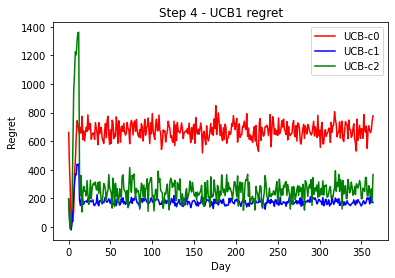

In [2]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("Day")
plt.ylabel("Regret")
plt.plot(regret_c0_ucb,'r', label="UCB-c0")
plt.plot(regret_c1_ucb, 'b', label="UCB-c1")
plt.plot(regret_c2_ucb, 'g', label="UCB-c2")
plt.title("Step 4 - UCB1 regret")
plt.legend()
plt.show()

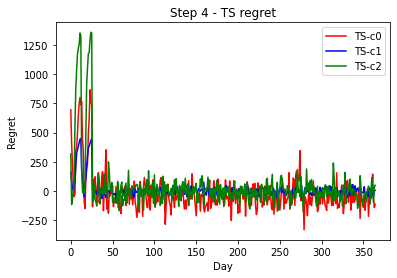

In [3]:
import matplotlib.pyplot as plt 

plt.figure(1)
plt.xlabel("Day")
plt.ylabel("Regret")
plt.plot(regret_c0_ts,'r', label="TS-c0")
plt.plot(regret_c1_ts, 'b', label="TS-c1")
plt.plot(regret_c2_ts, 'g', label="TS-c2")
plt.title("Step 4 - TS regret")
plt.legend()
plt.show()

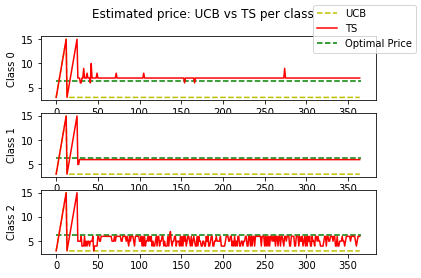

In [4]:
import matplotlib.pyplot as plt
import numpy as np

YY_ucb = np.array(price_ev_per_day_ucb) 
YY_ts = np.array(price_ev_per_day_ts)

fig, axs = plt.subplots(3)
fig.suptitle('Estimated price: UCB vs TS per class')
axs[0].plot(YY_ucb[:,0],'y', linestyle="dashed")
axs[0].plot(YY_ts[:,0],'r')
axs[0].hlines(opt_price, 0, T, 'g', linestyles='dashed')
axs[0].set(ylabel="Class 0")
axs[1].plot(YY_ucb[:,1],'y', linestyle="dashed")
axs[1].plot(YY_ts[:,1],'r')
axs[1].hlines(opt_price, 0, T, 'g', linestyles='dashed')
axs[1].set(ylabel="Class 1")
axs[2].plot(YY_ucb[:,2],'y', linestyle="dashed")
axs[2].plot(YY_ts[:,2],'r')
axs[2].hlines(opt_price, 0, T, 'g', linestyles='dashed')
axs[2].set(ylabel="Class 2")
fig.legend(["UCB","TS","Optimal Price"])